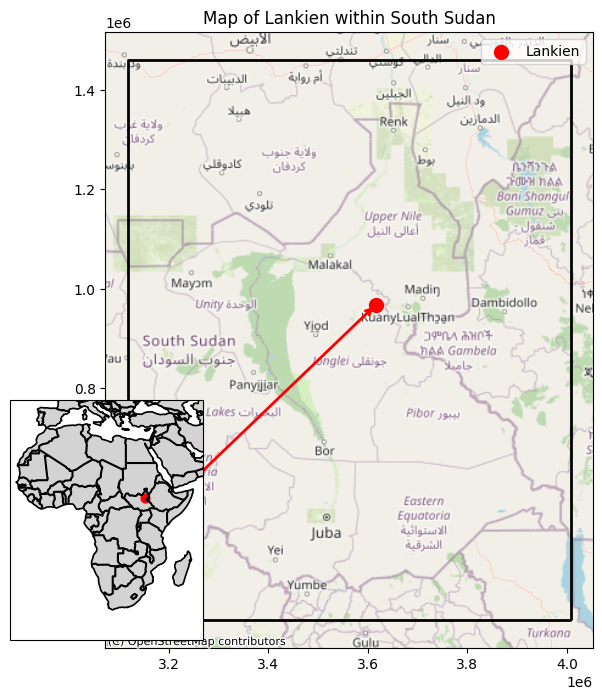

In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point, box

# Define coordinates for Lankien
lankien_coords = {"latitude": 8.6583, "longitude": 32.4783}

# Create a GeoDataFrame for Lankien
gdf = gpd.GeoDataFrame(
    {"Location": ["Lankien"]},
    geometry=[Point(lankien_coords["longitude"], lankien_coords["latitude"])],
    crs="EPSG:4326",  # WGS 84 coordinate system
)

# Convert to Web Mercator for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Define the bounding box to zoom into South Sudan
south_sudan_bbox = box(28, 3, 36, 13)  # Rough bounding box for South Sudan
south_sudan_gdf = gpd.GeoDataFrame(geometry=[south_sudan_bbox], crs="EPSG:4326").to_crs(epsg=3857)

# Create the main map
fig, ax = plt.subplots(figsize=(10, 8))
south_sudan_gdf.boundary.plot(ax=ax, color="black", linewidth=2)  # Thicker borders
gdf.plot(ax=ax, color="red", markersize=100, label="Lankien")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=6)

ax.set_title("Map of Lankien within South Sudan")
ax.legend()

# Add inset map of Africa
inset_ax = fig.add_axes([0.12, 0.12, 0.3, 0.3], projection=ccrs.PlateCarree())  # Inset position
inset_ax.set_extent([-20, 55, -40, 40])  # Extent covering Africa

# Add map features
inset_ax.add_feature(cfeature.LAND, color="lightgray")
inset_ax.add_feature(cfeature.BORDERS, linewidth=1.5, edgecolor="black")  # Thicker international borders
inset_ax.add_feature(cfeature.COASTLINE, linewidth=1.2, edgecolor="black")

# Plot Lankien on Africa map
inset_ax.scatter(lankien_coords["longitude"], lankien_coords["latitude"], color="red", marker="o", s=40, transform=ccrs.PlateCarree())

# Draw an arrow linking the inset map to South Sudan on the main map
ax.annotate("",
            xy=(gdf.geometry.x[0], gdf.geometry.y[0]),  # Lankien in main map
            xytext=(0.15, 0.25),  # Position in inset map
            textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", color="red", lw=2))

plt.show()
